Shape of dataset: (4111, 18)

First 5 rows:


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.00,0.00,0.00,7.32,100.00,0.00,21.90
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.00,0.00,0.00,0.00,0.00,100.00,21.60
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.00,5.58,60.00,0.00,0.00,0.00,20.90
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.00,1.40,75.00,0.00,0.00,100.00,20.90
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.00,2.73,42.00,10.23,100.00,0.00,20.40



Column names:
['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                    

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.00
mean,12.37,5.73,0.26,178.20,77.39,183.32,2.44,35.54,3.15,42.64,1.25,26.30,38.96,0.61
std,9.37,5.10,0.82,8.56,17.79,9.37,1.99,20.40,2.85,22.32,1.94,28.70,34.43,1.51
min,0.00,0.00,0.00,152.40,47.63,147.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7.00,2.00,0.00,172.72,65.77,177.80,0.83,27.00,1.55,36.00,0.00,0.00,0.00,0.00
50%,11.00,5.00,0.00,177.80,77.11,182.88,2.33,40.00,2.94,50.00,0.59,22.00,42.00,0.00
75%,17.00,8.00,0.00,182.88,83.91,190.50,3.60,49.00,4.23,58.00,1.94,45.00,66.00,0.70
max,253.00,83.00,11.00,226.06,349.27,213.36,17.65,100.00,52.50,100.00,32.14,100.00,100.00,21.90


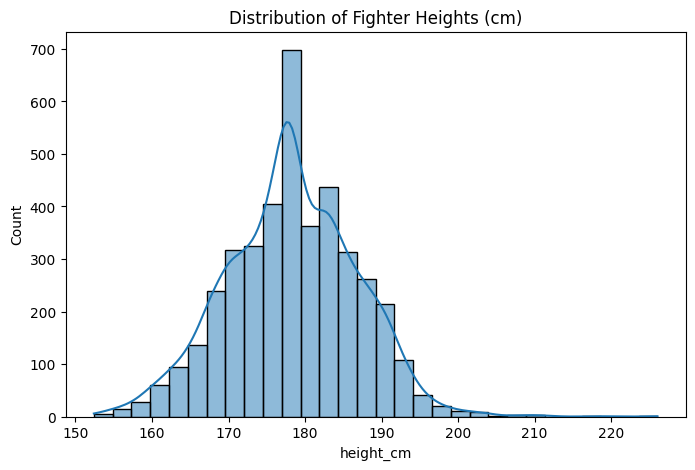

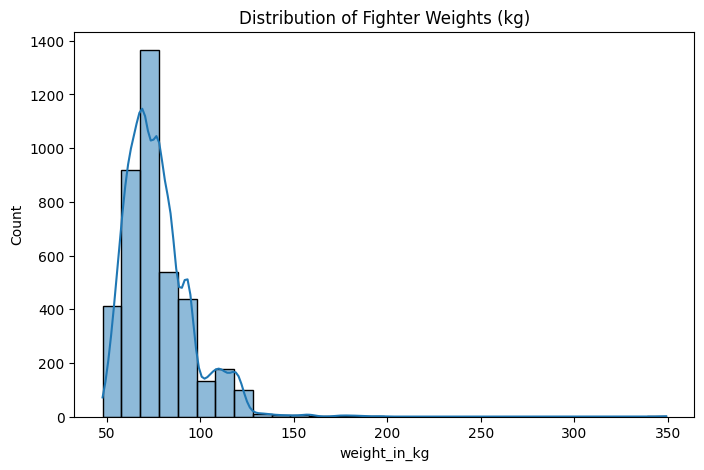

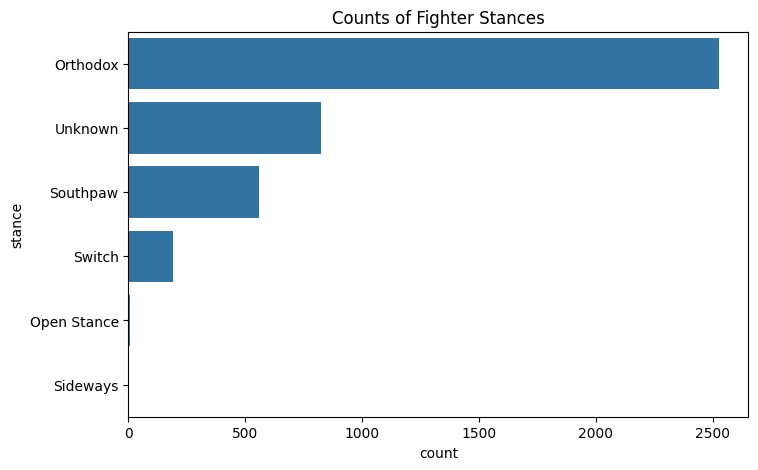

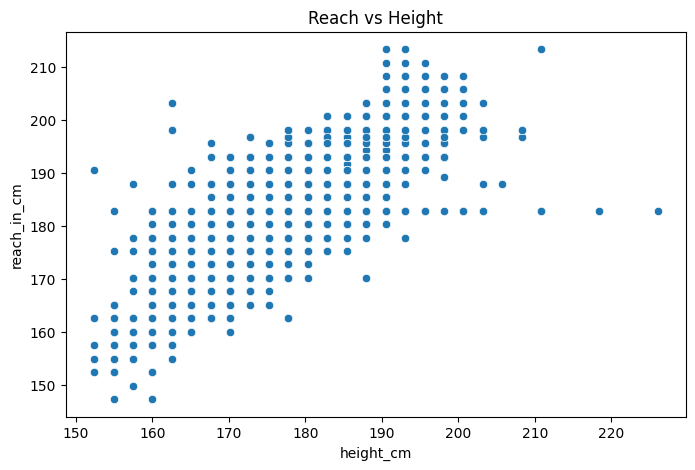

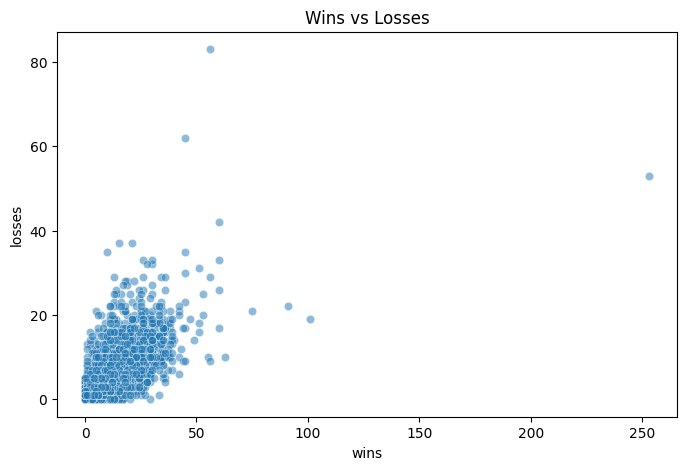

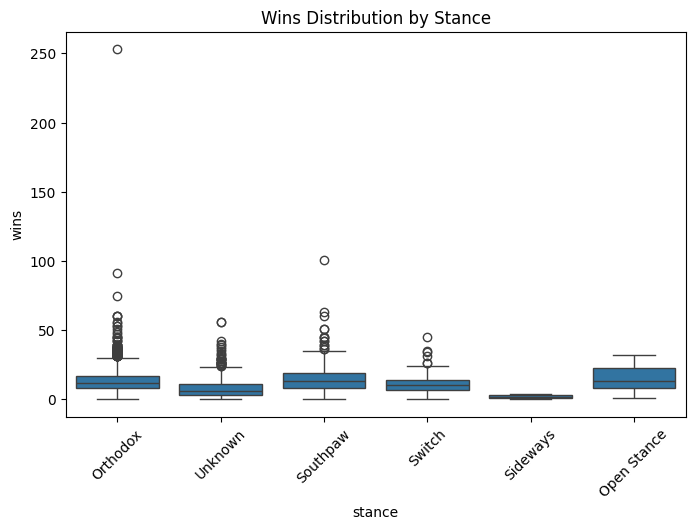

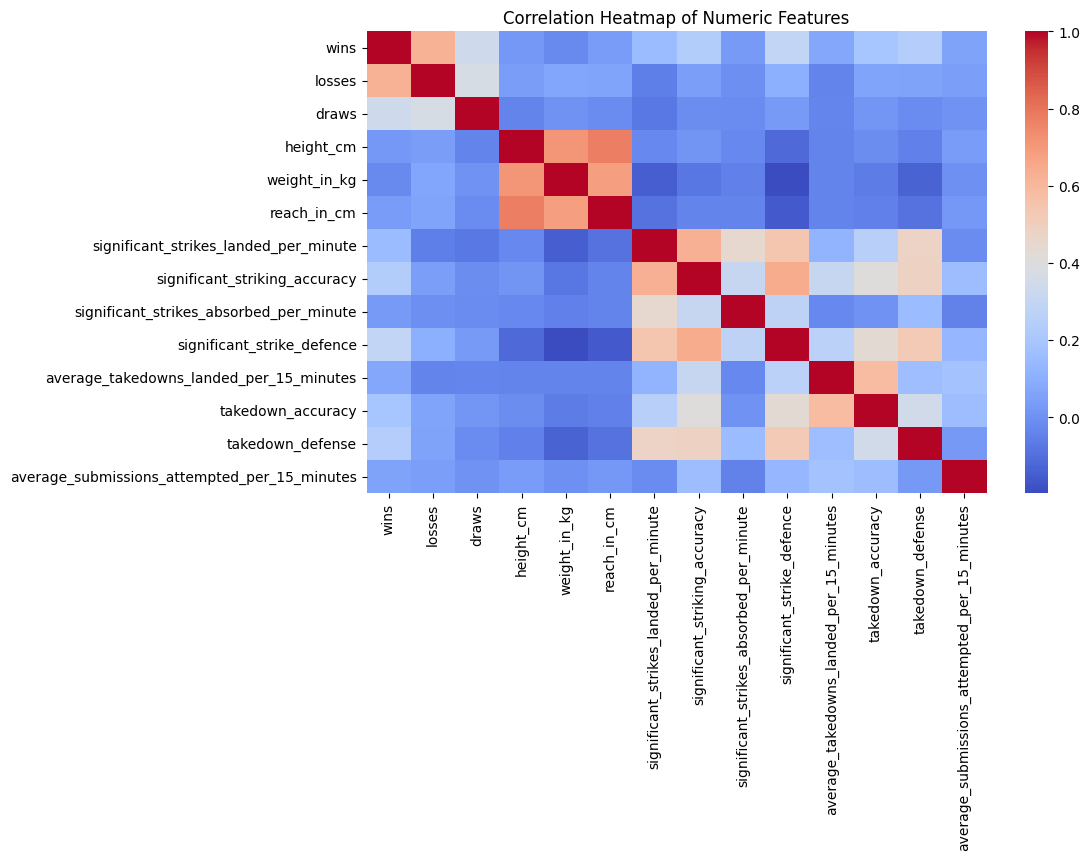

In [10]:
# --- libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format


plt.rcParams["figure.figsize"] = (8, 5)


CSV_PATH = "ufc-fighters-statistics.csv"
df = pd.read_csv(CSV_PATH)


print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn names:")
print(df.columns.tolist())

df.info()


df.describe()


df.isna().sum().sort_values(ascending=False)

df = df.drop(columns=["nickname"])


df["stance"] = df["stance"].fillna("Unknown")


df["height_cm"] = df["height_cm"].fillna(df["height_cm"].median())
df["weight_in_kg"] = df["weight_in_kg"].fillna(df["weight_in_kg"].median())


if "weight_in_kg" in df.columns:
    df["reach_in_cm"] = df.groupby("weight_in_kg")["reach_in_cm"].transform(
        lambda x: x.fillna(x.median())
    )


df = df.drop(columns=["date_of_birth"])


print(df.isna().sum())

df["reach_in_cm"] = df.groupby("weight_in_kg")["reach_in_cm"].transform(
    lambda x: x.fillna(x.median())
)


df["reach_in_cm"] = df["reach_in_cm"].fillna(df["reach_in_cm"].median())


print("Missing values after cleaning:")
print(df.isna().sum())

print("Rows, Columns:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nSummary statistics:\n")
display(df.describe())

sns.histplot(df["height_cm"], bins=30, kde=True)
plt.title("Distribution of Fighter Heights (cm)")
plt.show()


sns.histplot(df["weight_in_kg"], bins=30, kde=True)
plt.title("Distribution of Fighter Weights (kg)")
plt.show()


sns.countplot(y="stance", data=df, order=df["stance"].value_counts().index)
plt.title("Counts of Fighter Stances")
plt.show()

sns.scatterplot(x="height_cm", y="reach_in_cm", data=df)
plt.title("Reach vs Height")
plt.show()


sns.scatterplot(x="wins", y="losses", data=df, alpha=0.5)
plt.title("Wins vs Losses")
plt.show()


sns.boxplot(x="stance", y="wins", data=df)
plt.xticks(rotation=45)
plt.title("Wins Distribution by Stance")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(),
            cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


